# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# DataSet Import and Visiualization

In [2]:
heart = pd.read_csv("heart.csv")
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
cols = list(heart.columns)
cols

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

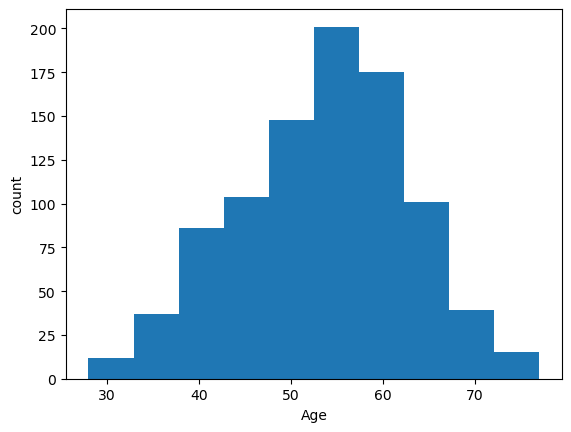

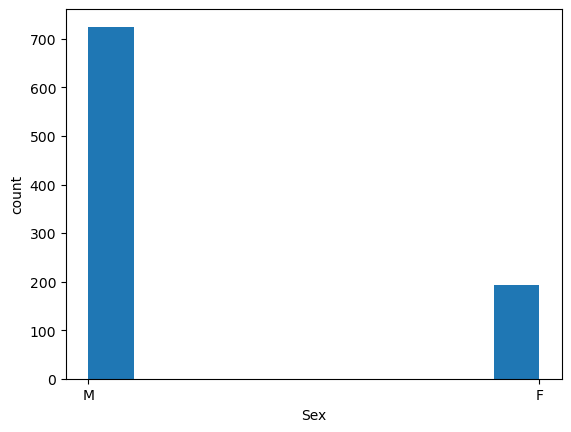

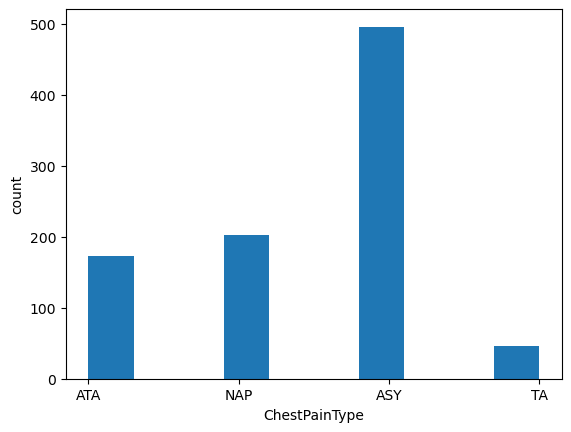

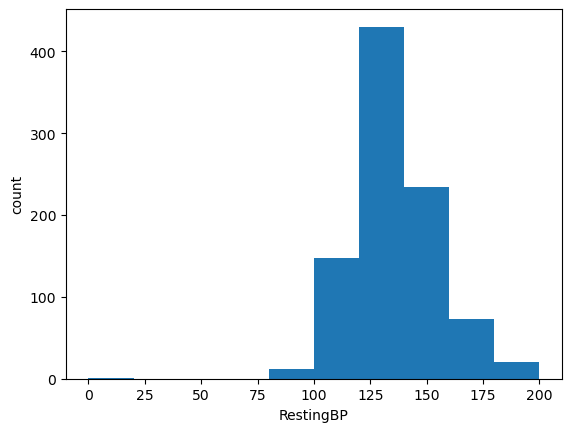

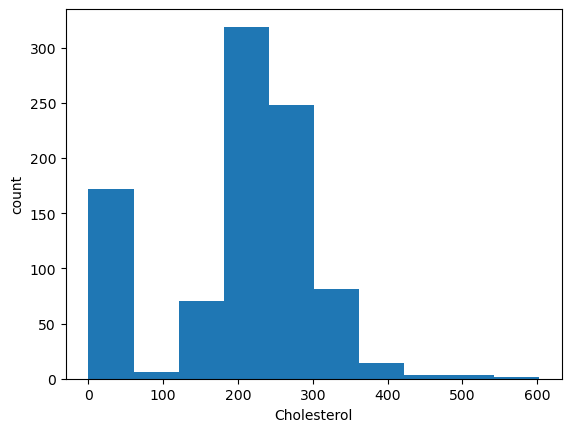

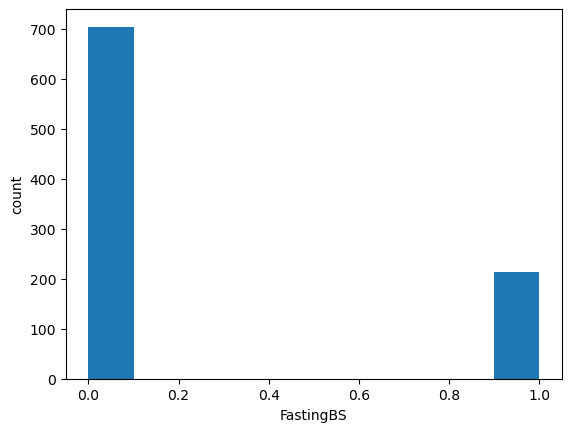

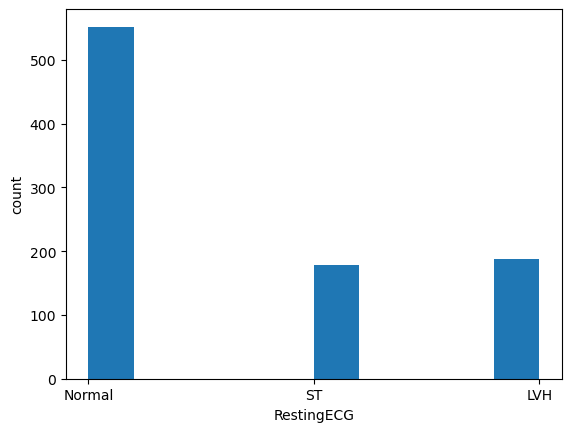

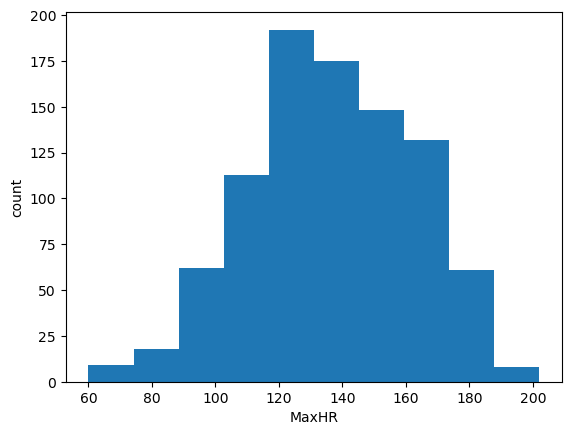

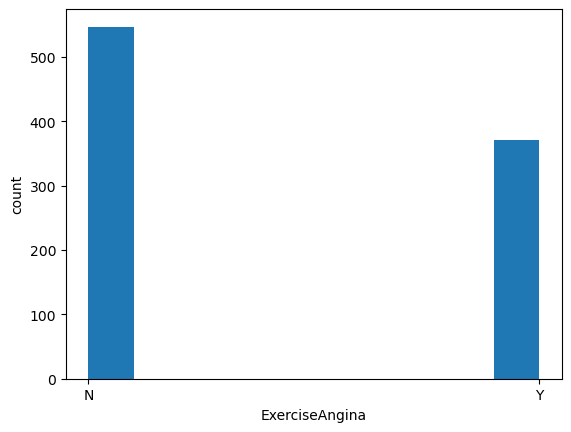

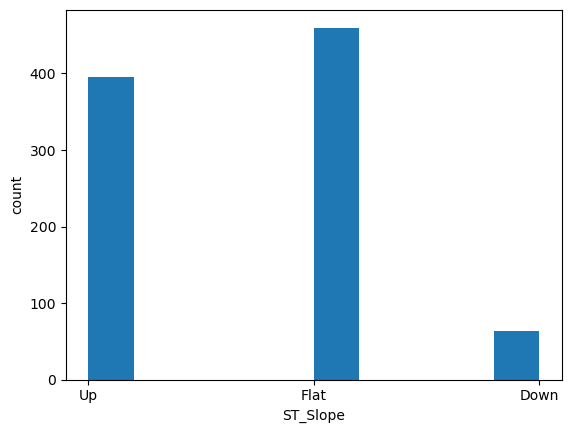

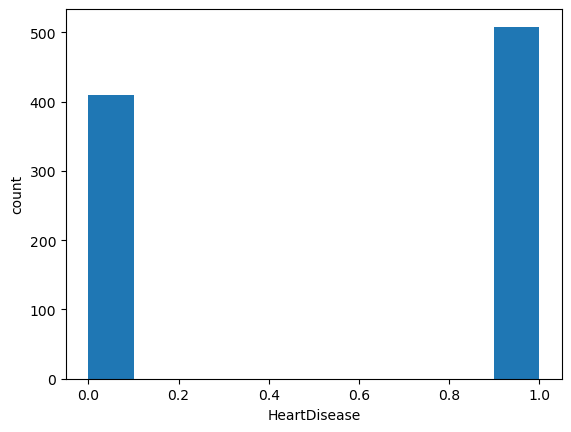

In [7]:
for x in cols:
    if (heart[x].dtypes == "object" or heart[x].dtypes == "int64"):
        plt.hist(heart[x])
        plt.xlabel(x)
        plt.ylabel("count")
        plt.show()

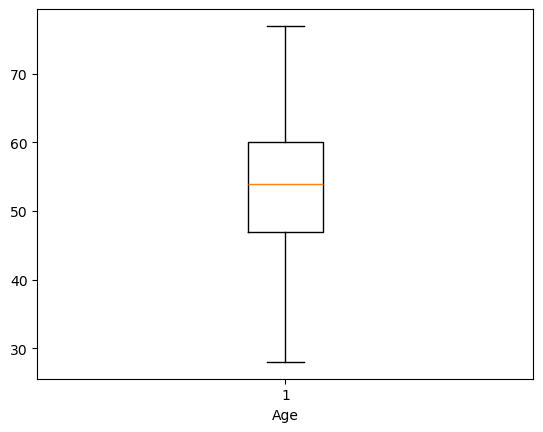

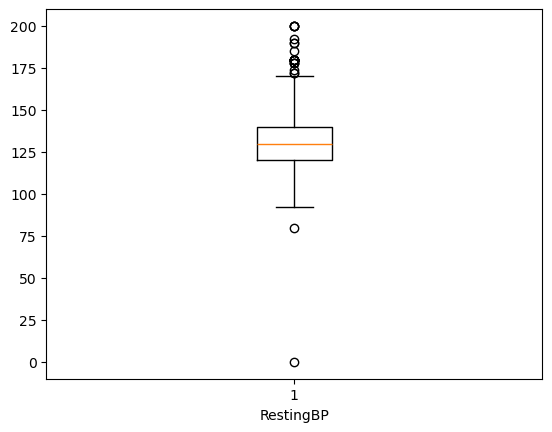

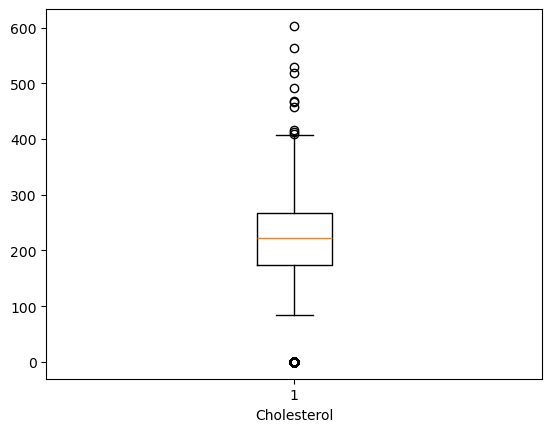

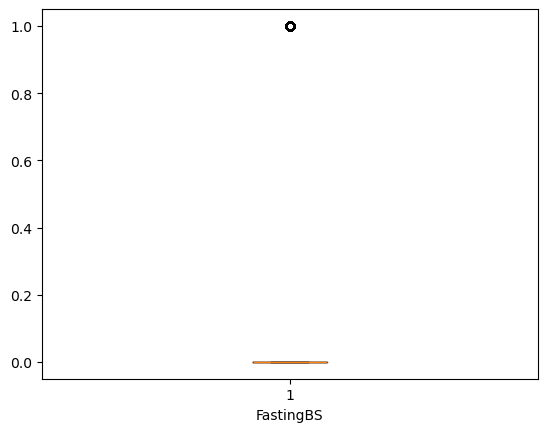

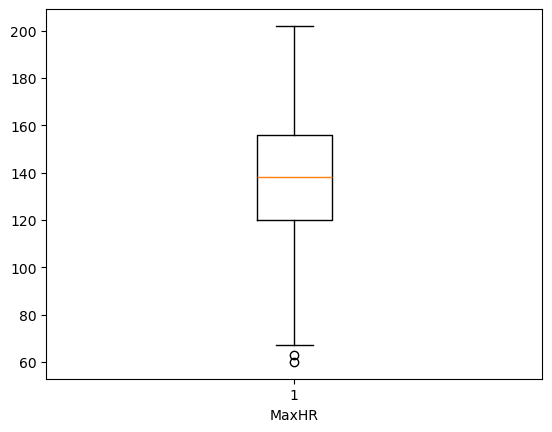

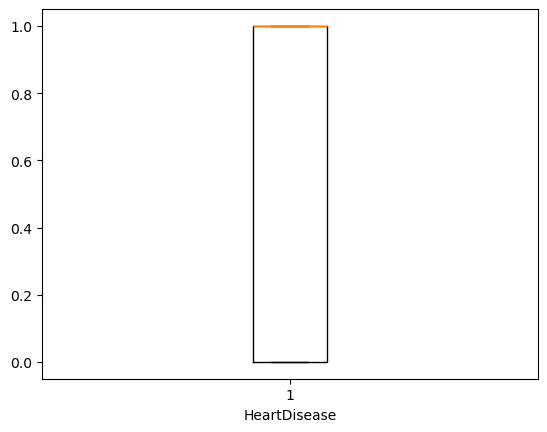

In [8]:
for x in cols:
     if(heart[x].dtypes == 'int64'):
        plt.boxplot(heart[x])
        plt.xlabel(x)
        plt.show()

# Separating categorical columns

In [9]:
cat_cols = heart[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]
cat_cols

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


# Converting Categorical cols into Numerical cols

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_cols:
    heart[i] = label_encoder.fit_transform(heart[i])
#fit --> giving the data, transform --> converting the data into numerical form

In [11]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [12]:
heart.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

## Conclusion 1:- 
- since the data is un balanced we need to manage the ratio of data when training

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


## conclusion 2:
- Key risk factors
Age,Sex,Cholesterol (Chol),Resting Blood Pressure (Resting BP),Fasting Blood Sugar (Fasting VS),Exercise Angina (Exercise Angina),ST Slope (ST Slope),Oldpeak
- Supporting indicators
Chest Pain Type (ChestPain Type),
Resting ECG (Resting ECG),
Maximum Heart Rate (MaxHR)
- * so we consider all the cols

# Train Test Split

In [14]:
X = heart[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
Y = heart[["HeartDisease"]]

In [15]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [16]:
Y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


## Balancing the Data Set

In [17]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X,Y = oversample.fit_resample(X, Y)
Y.HeartDisease.value_counts()

HeartDisease
0    508
1    508
Name: count, dtype: int64

## Split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=50)

## Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [20]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

# Classification Building

## 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='liblinear', random_state=42)
logistic.fit(x_train_scaled,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42, solver='liblinear')

### Prediction

In [22]:
pred_logistic = logistic.predict(x_test_scaled)

### Error Metrics for Logistic Regression

In [23]:

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_curve, auc,log_loss
logistic_metrics = {}

# Accuracy
logistic_metrics["Accuracy"] = accuracy_score(y_test, pred_logistic)

# Confusion Matrix
logistic_metrics["Confusion Matrix"] = confusion_matrix(y_test, pred_logistic)

# Precision
logistic_metrics["Precision"] = precision_score(y_test, pred_logistic)

# Recall (Sensitivity)
logistic_metrics["Recall"] = recall_score(y_test, pred_logistic)

# F1-Score
logistic_metrics["F1-Score"] = f1_score(y_test, pred_logistic)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_logistic)
logistic_metrics["ROC Curve"] = auc(fpr, tpr)

# Log-Loss
logistic_metrics["Log-Loss"] = log_loss(y_test, pred_logistic)


In [24]:
logistic_metrics

{'Accuracy': 0.8524590163934426,
 'Confusion Matrix': array([[130,  26],
        [ 19, 130]], dtype=int64),
 'Precision': 0.8333333333333334,
 'Recall': 0.87248322147651,
 'F1-Score': 0.8524590163934426,
 'ROC Curve': 0.8529082774049217,
 'Log-Loss': 5.317916073804171}

## 2. Naive Bayes 

In [25]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train_scaled,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Prediction

In [26]:
pred_naive = naive.predict(x_test_scaled)

### Error Metrics for Naive Bayes

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_curve, auc,log_loss
naive_metrics = {}

# Accuracy
naive_metrics["Accuracy"] = accuracy_score(y_test, pred_naive)

# Confusion Matrix
naive_metrics["Confusion Matrix"] = confusion_matrix(y_test, pred_naive)

# Precision
naive_metrics["Precision"] = precision_score(y_test, pred_naive)

# Recall (Sensitivity)
naive_metrics["Recall"] = recall_score(y_test, pred_naive)

# F1-Score
naive_metrics["F1-Score"] = f1_score(y_test, pred_naive)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_naive)
naive_metrics["ROC Curve"] = auc(fpr, tpr)

# Log-Loss
naive_metrics["Log-Loss"] = log_loss(y_test, pred_naive)

In [28]:
naive_metrics

{'Accuracy': 0.8524590163934426,
 'Confusion Matrix': array([[132,  24],
        [ 21, 128]], dtype=int64),
 'Precision': 0.8421052631578947,
 'Recall': 0.8590604026845637,
 'F1-Score': 0.8504983388704319,
 'ROC Curve': 0.852607124419205,
 'Log-Loss': 5.31791607380417}

## 3. Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=6)

### Prediction

In [30]:
pred_dtree = dtree.predict(x_test_scaled)

### Error Metrics for Decision Tree Classifier

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_curve, auc,log_loss
dtree_metrics = {}

# Accuracy
dtree_metrics["Accuracy"] = accuracy_score(y_test, pred_dtree)

# Confusion Matrix
dtree_metrics["Confusion Matrix"] = confusion_matrix(y_test, pred_dtree)

# Precision
dtree_metrics["Precision"] = precision_score(y_test, pred_dtree)

# Recall (Sensitivity)
dtree_metrics["Recall"] = recall_score(y_test, pred_dtree)

# F1-Score
dtree_metrics["F1-Score"] = f1_score(y_test, pred_dtree)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_dtree)
dtree_metrics["ROC Curve"] = auc(fpr, tpr)

# Log-Loss
dtree_metrics["Log-Loss"] = log_loss(y_test, pred_dtree)

In [32]:
dtree_metrics

{'Accuracy': 0.8524590163934426,
 'Confusion Matrix': array([[127,  29],
        [ 16, 133]], dtype=int64),
 'Precision': 0.8209876543209876,
 'Recall': 0.8926174496644296,
 'F1-Score': 0.8553054662379421,
 'ROC Curve': 0.8533600068834969,
 'Log-Loss': 5.317916073804171}

## 4. Random Forest Classifier 

In [33]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100,max_depth=6)
rforest.fit(x_train_scaled,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=6)

### Prediction

In [34]:
pred_rforest = rforest.predict(x_test_scaled)

### Error Metrics for Random Test Classifier

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_curve, auc,log_loss
rforest_metrics = {}

# Accuracy
rforest_metrics["Accuracy"] = accuracy_score(y_test, pred_rforest)

# Confusion Matrix
rforest_metrics["Confusion Matrix"] = confusion_matrix(y_test, pred_rforest)

# Precision
rforest_metrics["Precision"] = precision_score(y_test, pred_rforest)

# Recall (Sensitivity)
rforest_metrics["Recall"] = recall_score(y_test, pred_rforest)

# F1-Score
rforest_metrics["F1-Score"] = f1_score(y_test, pred_rforest)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_rforest)
rforest_metrics["ROC Curve"] = auc(fpr, tpr)

# Log-Loss
rforest_metrics["Log-Loss"] = log_loss(y_test, pred_rforest)

In [36]:
rforest_metrics

{'Accuracy': 0.8754098360655738,
 'Confusion Matrix': array([[131,  25],
        [ 13, 136]], dtype=int64),
 'Precision': 0.84472049689441,
 'Recall': 0.912751677852349,
 'F1-Score': 0.8774193548387097,
 'ROC Curve': 0.8762476337979694,
 'Log-Loss': 4.490684684545744}

## 5. SVM Classifier

In [37]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(x_train_scaled,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### Prediction

In [38]:
pred_svc = svc.predict(x_test_scaled)

### Error Metrics for SVM Classifier

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_curve, auc,log_loss
svc_metrics = {}

# Accuracy
svc_metrics["Accuracy"] = accuracy_score(y_test, pred_svc)

# Confusion Matrix
svc_metrics["Confusion Matrix"] = confusion_matrix(y_test, pred_svc)

# Precision
svc_metrics["Precision"] = precision_score(y_test, pred_svc)

# Recall (Sensitivity)
svc_metrics["Recall"] = recall_score(y_test, pred_svc)

# F1-Score
svc_metrics["F1-Score"] = f1_score(y_test, pred_svc)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_svc)
svc_metrics["ROC Curve"] = auc(fpr, tpr)

# Log-Loss
svc_metrics["Log-Loss"] = log_loss(y_test, pred_svc)

In [40]:
svc_metrics

{'Accuracy': 0.8688524590163934,
 'Confusion Matrix': array([[128,  28],
        [ 12, 137]], dtype=int64),
 'Precision': 0.8303030303030303,
 'Recall': 0.9194630872483222,
 'F1-Score': 0.8726114649681529,
 'ROC Curve': 0.8699879538805714,
 'Log-Loss': 4.727036510048151}

## 6. KNN Classification

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

### Prediction

In [42]:
pred_knn = knn.predict(x_test_scaled)

### Error Metrics for KNN Classifier

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_curve, auc,log_loss
knn_metrics = {}

# Accuracy
knn_metrics["Accuracy"] = accuracy_score(y_test, pred_knn)

# Confusion Matrix
knn_metrics["Confusion Matrix"] = confusion_matrix(y_test, pred_knn)

# Precision
knn_metrics["Precision"] = precision_score(y_test, pred_knn)

# Recall (Sensitivity)
knn_metrics["Recall"] = recall_score(y_test, pred_knn)

# F1-Score
knn_metrics["F1-Score"] = f1_score(y_test, pred_knn)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_knn)
knn_metrics["ROC Curve"] = auc(fpr, tpr)

# Log-Loss
knn_metrics["Log-Loss"] = log_loss(y_test, pred_knn)

In [44]:
knn_metrics

{'Accuracy': 0.8590163934426229,
 'Confusion Matrix': array([[131,  25],
        [ 18, 131]], dtype=int64),
 'Precision': 0.8397435897435898,
 'Recall': 0.8791946308724832,
 'F1-Score': 0.8590163934426229,
 'ROC Curve': 0.8594691103080365,
 'Log-Loss': 5.0815642483017625}

# Graident Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb.fit(x_train_scaled,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

### Prediction

In [46]:
pred_gb = gb.predict(x_test_scaled)

### Error Metrics for Gradien Boostin Classifier

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_curve, auc,log_loss
gb_metrics = {}

# Accuracy
gb_metrics["Accuracy"] = accuracy_score(y_test, pred_gb)

# Confusion Matrix
gb_metrics["Confusion Matrix"] = confusion_matrix(y_test, pred_gb)

# Precision
gb_metrics["Precision"] = precision_score(y_test, pred_gb)

# Recall (Sensitivity)
gb_metrics["Recall"] = recall_score(y_test, pred_gb)

# F1-Score
gb_metrics["F1-Score"] = f1_score(y_test, pred_gb)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_gb)
gb_metrics["ROC Curve"] = auc(fpr, tpr)

# Log-Loss
gb_metrics["Log-Loss"] = log_loss(y_test, pred_gb)

In [48]:
gb_metrics

{'Accuracy': 0.8688524590163934,
 'Confusion Matrix': array([[133,  23],
        [ 17, 132]], dtype=int64),
 'Precision': 0.8516129032258064,
 'Recall': 0.8859060402684564,
 'F1-Score': 0.868421052631579,
 'ROC Curve': 0.8692350714162795,
 'Log-Loss': 4.727036510048151}